# <center>AI Powered Career Guidance Job Recommender System</center>

Will be using Transformers(distillbert):

https://huggingface.co/docs/transformers/main/en/main_classes/model#transformers.PreTrainedModel

In [4]:
#library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# For TensorFlow
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
pip install PyMuPDF python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 21.8 MB/s eta 0:00:00


In [5]:
# import the necessary libaries to enable the loading of the resume, whether in doc or pdf format
import pymupdf
from docx import Document

In [16]:
file_path = r'training_datasets\AI-powered-career-guidance-project-dataset\data'
file = file_path + '\ACCOUNTANT\10554236.pdf'
print(file)

training_datasets\AI-powered-career-guidance-project-dataset\data\ACCOUNTANTE54236.pdf


In [7]:
#creating a function to extract the text in the pdf
def extract_text_from_pdf(pdf_path):
    full_text = ""
    try:
        with pymupdf.open(pdf_path) as doc:
          for page in doc:
              full_text = "\n".join([page.get_text() for page in doc])
    except Exception as e:
        print(f"Failed to read PDF {pdf_path}: {e}")
    return full_text

#print(extract_text_from_pdf(file))

In [8]:
def extract_text_from_docx(docx_path):
    text = ""
    try:
        doc = Document(docx_path)
        text = "\n".join([para.text for para in doc.paragraphs])
    except Exception as e:
        print(f"Failed to read DOCX {docx_path}: {e}")
    return text


In [17]:
file = file_path + '\DATA ANALYST_SCIENTIST\Favoured ilamina furro.docx'
file

'training_datasets\\AI-powered-career-guidance-project-dataset\\data\\DATA ANALYST_SCIENTIST\\Favoured ilamina furro.docx'

In [18]:
r'training_datasets\AI-powered-career-guidance-project-dataset\data\DATA ANALYST_SCIENTIST\Favoured ilamina furro.docx'

'training_datasets\\AI-powered-career-guidance-project-dataset\\data\\DATA ANALYST_SCIENTIST\\Favoured ilamina furro.docx'

In [19]:
extract_text_from_docx(file)

'FURO FAVOURED ILAMINA | PETROCHEMICAL ENGINEER | DATA ANALYST\nfavouredfuro@gmail.com\n+2347065603910\nLinkedIn Profile\n\n Data Analyst | Project Management | HSE Officer | Petrochemical Engineer\n\nHighly skilled and results-driven Data Analysis, Project Management, and HSE (Health, Safety, and Environment).\n Expert in combining engineering knowledge with data-driven insights to optimize operations, enhance safety protocols, and ensure compliance with industry standards. \nProficient in leading cross-functional teams, managing complex projects, and implementing robust safety and environmental strategies in high-stakes environments.\n\n\n\n\nWork Experience\n\n\nIndustrial Rigger \t\t\t\t\t                                                2023          Onshore and Offshore Safety Institute\t\t\t\t\t\t\t\n•   Adjust actions in relation to other actions.\n•   Conducting Quality Control Analysis.\n•   Performing routine maintenance.\n•   Determining the right kind of tool and equipment a

### Extracting with both functions

In [13]:
def extract_resume_text(file_path):
    ext = os.path.splitext(file_path)[1].lower()
    if ext == ".pdf":
        return extract_text_from_pdf(file_path)
    elif ext == ".docx":
        return extract_text_from_docx(file_path)
    else:
        return None  # unsupported file type

In [22]:
base_dir = r'training_datasets\AI-powered-career-guidance-project-dataset\data'

In [23]:
data = []

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith((".pdf", ".docx")):
                file_path = os.path.join(folder_path, filename)
                text = extract_resume_text(file_path)
                if text:
                    data.append((text, folder))  # (resume_text, label)

# Create and save DataFrame
df = pd.DataFrame(data, columns=["text", "label"])
df.to_csv("resume_data.csv", index=False)

print(f"✅ Extracted and saved {len(df)} labeled resumes.")

Failed to read PDF training_datasets\AI-powered-career-guidance-project-dataset\data\NOT_A_RESUME\2025 Sticker 311224 approved[1].pdf: document closed or encrypted
Failed to read DOCX training_datasets\AI-powered-career-guidance-project-dataset\data\NOT_A_RESUME\Letter_of_account_opening.docx: Bad CRC-32 for file 'word/media/image10.png'
Failed to read DOCX training_datasets\AI-powered-career-guidance-project-dataset\data\NOT_A_RESUME\Project Review.docx: Package not found at 'training_datasets\AI-powered-career-guidance-project-dataset\data\NOT_A_RESUME\Project Review.docx'
Failed to read PDF training_datasets\AI-powered-career-guidance-project-dataset\data\NOT_A_RESUME\Technical Writing_ Cultivating a Data-Driven Culture through Effective Documentation of Data Product.pptx.pdf: no such file: 'training_datasets\AI-powered-career-guidance-project-dataset\data\NOT_A_RESUME\Technical Writing_ Cultivating a Data-Driven Culture through Effective Documentation of Data Product.pptx.pdf'
Fail

In [ ]:
for folder in os.listdir(base_dir)[:2]:
  print(folder)
  folder_path = os.path.join(base_dir, folder)
  print(folder_path)

ENGINEERING
/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/AI-powered-career-guidance-project-dataset/data/ENGINEERING
SALES
/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/AI-powered-career-guidance-project-dataset/data/SALES


In [24]:
df

,text,label
0,ACCOUNTANT\nSummary\nFinancial Accountant spec...,ACCOUNTANT
1,STAFF ACCOUNTANT\nSummary\nHighly analytical a...,ACCOUNTANT
2,ACCOUNTANT\nProfessional Summary\nTo obtain a ...,ACCOUNTANT
3,SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...,ACCOUNTANT
4,SENIOR ACCOUNTANT\nProfessional Summary\nSenio...,ACCOUNTANT
...,...,...
2730,READING TEACHER\nSummary\nI am a highly motiva...,TEACHER
2731,HISTORY TEACHER\nProfessional Summary\nTo be e...,TEACHER
2732,"TEACHER\nSummary\nHighly ethical, dependable, ...",TEACHER
2733,TEACHER\nSummary\nTalented early education pro...,TEACHER


In [25]:
df['text'][0]

'ACCOUNTANT\nSummary\nFinancial Accountant specializing in financial planning, reporting and analysis within the Department of Defense.\nHighlights\nAccount reconciliations\nResults-oriented\nFinancial reporting\nCritical thinking\nAccounting operations professional\nAnalysis of financial systems\nERP (Enterprise Resource Planning) software.\nExcellent facilitator\nAccomplishments\nServed on a tiger team which identified and resolved General Ledger postings in DEAMS totaling $360B in accounting adjustments. This allowed\nfor the first successful fiscal year-end close for 2012.\nIn collaboration with DFAS Europe, developed an automated tool that identified duplicate obligations. This tool allowed HQ USAFE to\ndeobligate over $5M in duplicate obligations.\nExperience\nCompany Name July 2011 to November 2012 Accountant \nCity , State\nEnterprise Resource Planning Office (ERO)\nIn this position as an Accountant assigned to the Defense Enterprise Accounting and Management System (DEAMS) ERO

## Loading the dataset

In [32]:
df = pd.read_csv('resume_data.csv')
len(df[df['label']=='NOT_A_RESUME'])

127

In [31]:
df.shape

(2735, 2)

In [33]:
#from google.colab import sheets
#sheet = sheets.InteractiveSheet(df=df)
df['text'][0]

'ACCOUNTANT\nSummary\nFinancial Accountant specializing in financial planning, reporting and analysis within the Department of Defense.\nHighlights\nAccount reconciliations\nResults-oriented\nFinancial reporting\nCritical thinking\nAccounting operations professional\nAnalysis of financial systems\nERP (Enterprise Resource Planning) software.\nExcellent facilitator\nAccomplishments\nServed on a tiger team which identified and resolved General Ledger postings in DEAMS totaling $360B in accounting adjustments. This allowed\nfor the first successful fiscal year-end close for 2012.\nIn collaboration with DFAS Europe, developed an automated tool that identified duplicate obligations. This tool allowed HQ USAFE to\ndeobligate over $5M in duplicate obligations.\nExperience\nCompany Name July 2011 to November 2012 Accountant \nCity , State\nEnterprise Resource Planning Office (ERO)\nIn this position as an Accountant assigned to the Defense Enterprise Accounting and Management System (DEAMS) ERO

## Preprocessing the text using BERT

In [6]:
import re

def clean_text(text):
    """
    Cleans raw resume text for BERT input.
    - Removes URLs, special characters, and extra spaces
    - Converts to lowercase
    """

    if not isinstance(text, str):
        return ""  # or np.nan if you want to track missing

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)

    # Remove newline, tab, and multiple spaces
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')
    text = re.sub(' +', ' ', text)

    # Remove special characters (except alphanumerics and basic punctuation)
    text = re.sub(r"[^a-zA-Z0-9.,!?()\- ]", '', text)

    # Lowercase the text
    text = text.lower()

    return text.strip()


In [ ]:
df.dtypes

,0
text,object
label,object


In [ ]:
clean_df = df.copy()
clean_df['text'] = clean_df['text'].apply(clean_text)

In [ ]:
clean_df.shape

(2608, 2)

In [ ]:
clean_df['text'][0]

'software engineering manager summary experienced software engineer, and hands-on engineering manager with 20 years of product development experience in broadcast media, and 10 years of experience in leading development teams (20 engineers), hiring (10 offers, 40 interviews), hr personnel procedures, performance reviews, and project transitions. professional experience september 2009 to current company name city , state software engineering manager visual c, windows, stl, oop, mfc, threads, file maps, atl, ipc, ftp, tcp, http, xml, json, services, web services, rest api, soa, media formats and standards, codec sdk and integration, mpeg-dash, api design and documentation. bcd spinoff as imagine in 2013) nexio video servers and applications facilitate collaborative workflow in nexio lan with video servers, services and applications running in various nodes. media comes from proprietary san or generic storage off nas. development and team management, nexio servers applications, playout bu

## Encoding, Tokenization, DataLoader

In [ ]:
#pip install transformers
from transformers import AutoTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

In [ ]:
#encoding the target label
le = LabelEncoder()
clean_df['label'] = le.fit_transform(clean_df['label'])

In [ ]:
clean_df['label'].values

array([16, 16, 16, ...,  1,  1,  1])

In [ ]:
#getting the labels name from the le, with their respective ending
list(le.classes_)

['ACCOUNTANT',
 'ADVOCATE',
 'AGRICULTURE',
 'APPAREL',
 'ARTS',
 'AUTOMOBILE',
 'AVIATION',
 'BANKING',
 'BPO',
 'BUSINESS-DEVELOPMENT',
 'CHEF',
 'CONSTRUCTION',
 'CONSULTANT',
 'DATA ANALYST_SCIENTIST',
 'DESIGNER',
 'DIGITAL-MEDIA',
 'ENGINEERING',
 'FINANCE',
 'FITNESS',
 'HEALTHCARE',
 'HR',
 'INFORMATION-TECHNOLOGY',
 'PUBLIC-RELATIONS',
 'SALES',
 'TEACHER']

In [ ]:
len(le.classes_)

25

In [ ]:
#saving the encoded label as dataframe
encode_label = pd.DataFrame(list(le.classes_))
encode_label.to_csv('/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/AI-powered-career-guidance-project-dataset/encode_label.csv')

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(le.classes_))

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
pip install huggingface_hub[hf_xet]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 65.1 MB/s eta 0:00:00


In [ ]:
# Load tokenizer, using DistilBERT)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

class ResumeDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = str(self.texts[index])
        label = self.labels[index]

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt',
            return_attention_mask=True
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
#splitting the dataset for the data model and dataloader
train_texts, val_texts, train_labels, val_labels = train_test_split(
    clean_df['text'].tolist(),
    clean_df['label'].tolist(),
    test_size=0.2,
    stratify=clean_df['label']
)

In [ ]:
train_texts[0]

'construction safety officer summary resourceful and extroverted safety professional with five plus years of hands on experience in safety coordination. expert in occupational safety and emergency management. well versed in handling employee compensation claims and supervising risk analysis. qualifications and expertise proficient in facility monitoring and implementation of osha employee safety guidelines demonstrated ability to manage care operations, insurance underwriting and claim forwarding expertise in filing, handling and processing employee claims thorough knowledge of industrial hygiene standards well familiar with osha regulatory authorities adept at designing and implementing viable precautionary programs based on risk analysis committed to establishment, implementation and promotion state approved occupational policies and guidelines experience construction safety officer sep 2010 to jul 2014 company name  city , state responsible for doing regular work site inspections an

In [ ]:
train_dataset = ResumeDataset(train_texts, train_labels, tokenizer)
val_dataset = ResumeDataset(val_texts, val_labels, tokenizer)

In [ ]:
train_dataset[0]

{'input_ids': tensor([  101,  2810,  3808,  2961, 12654,  7692,  3993,  1998,  4654, 13181,
         26686,  3808,  2658,  2007,  2274,  4606,  2086,  1997,  2398,  2006,
          3325,  1999,  3808, 12016,  1012,  6739,  1999, 16928,  3808,  1998,
          5057,  2968,  1012,  2092,  7893,  2094,  1999,  8304,  7904,  9430,
          4447,  1998, 21238,  3891,  4106,  1012, 15644,  1998, 11532, 27029,
          1999,  4322,  8822,  1998,  7375,  1997,  9808,  3270,  7904,  3808,
         11594,  7645,  3754,  2000,  6133,  2729,  3136,  1010,  5427,  2104,
         18560,  1998,  4366,  2830,  2075, 11532,  1999, 15242,  1010,  8304,
          1998,  6364,  7904,  4447, 16030,  3716,  1997,  3919, 19548,  4781,
          2092,  5220,  2007,  9808,  3270, 10738,  4614, 26398,  2012, 12697,
          1998, 14972, 14874,  3653,  3540, 13700,  5649,  3454,  2241,  2006,
          3891,  4106,  5462,  2000,  5069,  1010,  7375,  1998,  4712,  2110,
          4844, 16928,  6043,  1998, 11

In [ ]:
len(train_dataset)

2086

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

## Model Training

In [ ]:
#training arguments
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    logging_dir='/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/logs',
    logging_steps=10,
    eval_strategy='epoch',
    metric_for_best_model='eval_loss',
)


In [ ]:
#initialze the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

In [ ]:
#Training the Model
print("Starting training...")
trainer.train()
print('Training completed...')

Starting training...


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: pro9jaeduinfo (pro9jaeduinfo-poshem-technologies-institute) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,1.514000,1.304103
2,0.937100,0.769422
3,0.482000,0.665526


Training completed...


In [ ]:
print('Evaluating model')
trainer.evaluate()

Evaluating model


{'eval_loss': 0.6655264496803284,
 'eval_runtime': 18.1399,
 'eval_samples_per_second': 28.776,
 'eval_steps_per_second': 0.496,
 'epoch': 3.0}

## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [ ]:
#predict on the validation set
predictions = trainer.predict(val_dataset)
y_pred = predictions.predictions.argmax(axis=-1)
print(y_pred)

[ 3  6  9 18  6 11 11 24 12 21 23  6 22 12 18  1  6 17 10 20 22 23 15 18
 10  6 20 21 23 14 22 10 13 24  2 19 17 18 12  7 24 23  4 16  4 22 11 10
  6 10  7 10 11 20 13  0 17 15 16 11  9 21 15 13  7  1 13 22 19  1 14 20
  0 12  0 23 11  9 23 12  7  6  1 15 15 13 17 21  0 18 13 16  2 11 20 15
 22 14 24 18 21 19 16 19 24  6 23 13  9 11  9  9 20 16  4 23  6 12  3 19
  6 16 16 11 15 14 21 19 24  9  3  7 24 12 23 14  0 22 24 16 16 20  0 21
  7 14  1 15  7 21 17 21 22  9 14 23  3 19 10 14 14 17 18  7 24  3 12 16
 16 19 10 11 19  9  6 16  4 23  6  4  3 16 13  9  1  0 24 17 10 19 15  1
 21 19 10 21 16  6 24 10 11  9  7  7 20 14 17 13 22 12 17 13  3 15  7 22
  2 12 13 21  7  4  7 22 10 13 17 11  7 15 14 22  6 19 23 17 10 20 14  4
 17 23 21  0 11 16 17 12  0 17 11 11 19 21 11  4  0  0  9  2 24  4 23  9
 13 14 20 19 18 22 18 19  6 12 13  6  6 20 13  3 10 22 22 23 12 22  6  2
 17 15  1  9 10 14 19  0  1 12 13 20  2  3  1 13 14 24 22  7 22 15 16 22
 19 21 23 10 20 12  6  1 15 21  0  0 16  6 21  9 16

In [ ]:
y_val = predictions.label_ids
print(y_val)

[ 3  6  9 18  6 11 11 24 12 21 23  6 22 12 18  1  6 17 10 20 22 23 15 18
 10  6 20 21 23 14 22 10 13 24 22 19 17 18 21  7 24 23  4 16  4 22 11 10
  4 10  4 10 11 20 13  0  1 15 16 11  9  2 15 13  7  1 13 15 19  5 14 20
  0 12  0 23 19  9 23 12  7  6  1  3 22 13 17 13  0 18 13 16  2 11 20 15
 22 14 24 18 21 19 16 19 24  6 23 12 18 11  9  9 20 16  4 23  6  4  3 19
  6 16 16 11  3 14 21 19 24  9 18  7 24 12 23 14  0 22 24 16 16 20  0 21
  7 14  1 15  7 21 17  5 22  9 14 23  3 19  4 14 14 17  5  7 24  3 12 16
  3 19 10 11  1  9  6 16  4 23  4  4  7 16 13  9  1  0 24 17 10  1 15  1
 21 19 10 15 16  6 24 10 11  9 19  7 20 14 17 13 10 12 17 13  3 21  7 22
  2 12 13 21  5  4  7  1 10 13 17 11  7 15 14 22  6 19  4 17 10 20 14  4
 17 23 21  0 11 16 17 12  0 17 11 11 19 21 11 22  0  0  9  2 24  4 23  9
 13 14 20 19 18 15  8 15  6 12 13  3  6 20 13  2  4 22 22 23 12 22  6 21
 19 15  1  9 10 14 19  0  1 12 13 20  2  3  1 13 14 24 15  8 15 15 16 22
 19 21 23 10 20 12  6  1 15 21  0  0 16  6 21  9 16

In [ ]:
#computing accuracy using accuracy_score

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8544061302681992


In [ ]:
#precision
precision = precision_score(y_val, y_pred, average='weighted')
print(f"Precision: {precision}")

Precision: 0.8353100137210165


In [ ]:
#fi-score
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.8412733112394635


In [ ]:
#print confusion metricing using the class name of le
print(classification_report(y_val, y_pred, target_names=le.classes_))

                        precision    recall  f1-score   support

            ACCOUNTANT       1.00      1.00      1.00        24
              ADVOCATE       0.87      0.83      0.85        24
           AGRICULTURE       0.67      0.46      0.55        13
               APPAREL       0.56      0.47      0.51        19
                  ARTS       0.85      0.52      0.65        21
            AUTOMOBILE       0.00      0.00      0.00         7
              AVIATION       0.80      1.00      0.89        24
               BANKING       0.73      0.83      0.78        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.96      1.00      0.98        24
                  CHEF       0.91      0.88      0.89        24
          CONSTRUCTION       0.95      0.95      0.95        22
            CONSULTANT       0.88      0.96      0.92        23
DATA ANALYST_SCIENTIST       0.92      0.96      0.94        25
              DESIGNER       1.00      

Confusion Matrix:


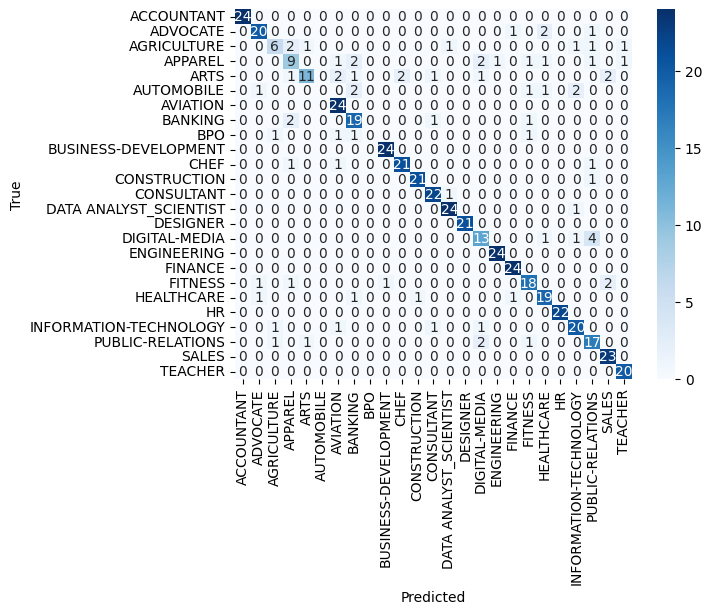

In [ ]:
#confusion metrics
confusion = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
confusion

#plotting with heatmap
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The model can still be improved by adding more dataset for training

## Testing on Resume

### Loading and Extraction

In [7]:
#creating a function to extract the text in the pdf
def extract_text_from_pdf(pdf_path):
    full_text = ""
    try:
        with pymupdf.open(pdf_path) as doc:
          for page in doc:
              full_text = "\n".join([page.get_text() for page in doc])
    except Exception as e:
        print(f"Failed to read PDF {pdf_path}: {e}")
    return full_text

In [8]:
file = '/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/AI-powered-career-guidance-project-dataset/data/ACCOUNTANT/10554236.pdf'

In [9]:
#Resume loading and Text Extraction
test_resume = extract_text_from_pdf(file)

In [10]:
test_resume

'ACCOUNTANT\nSummary\nFinancial Accountant specializing in financial planning, reporting and analysis within the Department of Defense.\nHighlights\nAccount reconciliations\nResults-oriented\nFinancial reporting\nCritical thinking\nAccounting operations professional\nAnalysis of financial systems\nERP (Enterprise Resource Planning) software.\nExcellent facilitator\nAccomplishments\nServed on a tiger team which identified and resolved General Ledger postings in DEAMS totaling $360B in accounting adjustments. This allowed\nfor the first successful fiscal year-end close for 2012.\nIn collaboration with DFAS Europe, developed an automated tool that identified duplicate obligations. This tool allowed HQ USAFE to\ndeobligate over $5M in duplicate obligations.\nExperience\nCompany Name July 2011 to November 2012 Accountant \nCity , State\nEnterprise Resource Planning Office (ERO)\nIn this position as an Accountant assigned to the Defense Enterprise Accounting and Management System (DEAMS) ERO

### Preprocessing

In [11]:
clean_resume_text = clean_text(test_resume)

In [12]:
clean_resume_text

'accountant summary financial accountant specializing in financial planning, reporting and analysis within the department of defense. highlights account reconciliations results-oriented financial reporting critical thinking accounting operations professional analysis of financial systems erp (enterprise resource planning) software. excellent facilitator accomplishments served on a tiger team which identified and resolved general ledger postings in deams totaling 360b in accounting adjustments. this allowed for the first successful fiscal year-end close for 2012. in collaboration with dfas europe, developed an automated tool that identified duplicate obligations. this tool allowed hq usafe to deobligate over 5m in duplicate obligations. experience company name july 2011 to november 2012 accountant city , state enterprise resource planning office (ero) in this position as an accountant assigned to the defense enterprise accounting and management system (deams) ero i was responsible for i

In [ ]:
#tokenization using bert and prediction
label_names = list(le.classes_)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to device once (outside the function ideally)
trainer.model.to(device)

def predict_resume(text, model, tokenizer, label_names):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    # Move inputs to the same device as the model
    inputs = {k: v.to(device) for k, v in inputs.items()}

    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.nn.functional.softmax(logits, dim=1)
    pred_idx = torch.argmax(probs, dim=1).item()
    return label_names[pred_idx], probs[0][pred_idx].item()

predicted_label, confidence = predict_resume(clean_resume_text, trainer.model, tokenizer, label_names)
print(f"Predicted label: {predicted_label} (Confidence: {confidence:.2f})")

Predicted label: ACCOUNTANT (Confidence: 0.90)


## Saving the Model

In [ ]:
# 1. After training, save your model and tokenizer
save_directory = "/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/models/saved_resume_classifier"
trainer.model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

('/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/Model/saved_resume_classifier/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/Model/saved_resume_classifier/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/Model/saved_resume_classifier/vocab.txt',
 '/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/Model/saved_resume_classifier/added_tokens.json',
 '/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/Model/saved_resume_classifier/tokenizer.json')

## Loading the Model

In [ ]:
# 2. Later (or in a new session), load the model and tokenizer
model = BertForSequenceClassification.from_pretrained(save_directory)
tokenizer = AutoTokenizer.from_pretrained(save_directory)

In [ ]:
# Detect device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# Your label names from LabelEncoder
label_names = list(le.classes_)
print(label_names)

['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS', 'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT', 'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DATA ANALYST_SCIENTIST', 'DESIGNER', 'DIGITAL-MEDIA', 'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR', 'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER']


In [ ]:
def predict_resume(text, model, tokenizer, label_names):
    # Tokenize inputs and move to the same device as model
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.nn.functional.softmax(logits, dim=1)
    pred_idx = torch.argmax(probs, dim=1).item()
    return label_names[pred_idx], probs[0][pred_idx].item()

In [ ]:
# Example usage
new_resume_text = "Experienced software engineer with expertise in cloud computing and APIs."

predicted_label, confidence = predict_resume(new_resume_text, model, tokenizer, label_names)
print(f"Predicted label: {predicted_label} (Confidence: {confidence:.2f})")

Predicted label: INFORMATION-TECHNOLOGY (Confidence: 0.70)


# SKILL GAP MATCHING

In [13]:
import json

In [14]:
skill_gap_file_path = '/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/AI-powered-career-guidance-project-dataset/data/skill_gap.json'

In [15]:
with open(skill_gap_file_path, 'r') as file:
    skill_gap_data = json.load(file)

In [16]:
skill_gap_data.keys()

dict_keys(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS', 'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT', 'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DATA ANALYST_SCIENTIST', 'DESIGNER', 'DIGITAL-MEDIA', 'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR', 'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'])

In [17]:
clean_resume_text

'accountant summary financial accountant specializing in financial planning, reporting and analysis within the department of defense. highlights account reconciliations results-oriented financial reporting critical thinking accounting operations professional analysis of financial systems erp (enterprise resource planning) software. excellent facilitator accomplishments served on a tiger team which identified and resolved general ledger postings in deams totaling 360b in accounting adjustments. this allowed for the first successful fiscal year-end close for 2012. in collaboration with dfas europe, developed an automated tool that identified duplicate obligations. this tool allowed hq usafe to deobligate over 5m in duplicate obligations. experience company name july 2011 to november 2012 accountant city , state enterprise resource planning office (ero) in this position as an accountant assigned to the defense enterprise accounting and management system (deams) ero i was responsible for i

In [18]:
skill_gap_data['ACCOUNTANT']

['Financial Reporting',
 'Taxation',
 'Auditing',
 'SAP',
 'QuickBooks',
 'Budget Forecasting',
 'Excel (Advanced)',
 'Data Analytics',
 'GAAP',
 'IFRS',
 'Internal Controls',
 'Cash Flow Management',
 'Power BI',
 'Financial Modeling',
 'Automation in Accounting (RPA)']

In [19]:
pip install fuzzywuzzy

In [20]:
## applying exact skill matching
# from the required skill and the ones in the resume i want to create a percentage value for skill gap
from fuzzywuzzy import fuzz

def extract_skills(resume_text, skill_set, fuzzy_threshold=90):
    resume_text = resume_text.lower()
    matched_skills = set()

    for skill in skill_set:
        # Exact match
        if skill.lower() in resume_text:
            matched_skills.add(skill)
        else:
            # Fuzzy match if not found
            ratio = fuzz.partial_ratio(skill.lower(), resume_text)
            if ratio >= fuzzy_threshold:
                matched_skills.add(skill)

    #selecting the skills that are not in the matched_skills
    remaining_skills = [skill for skill in skill_set if skill not in matched_skills]

    #percentage value for skill gap
    percentage_gap = (len(matched_skills) / len(skill_set)) * 100


    return sorted(list(matched_skills)), remaining_skills, percentage_gap


In [21]:
#performing the extraction
print(extract_skills(clean_resume_text, skill_gap_data['ACCOUNTANT']))


(['Auditing', 'Financial Reporting', 'SAP'], ['Taxation', 'QuickBooks', 'Budget Forecasting', 'Excel (Advanced)', 'Data Analytics', 'GAAP', 'IFRS', 'Internal Controls', 'Cash Flow Management', 'Power BI', 'Financial Modeling', 'Automation in Accounting (RPA)'], 20.0)


# COURSE RECOMMENDATION

In [24]:
pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [25]:
from sentence_transformers import SentenceTransformer, util
import torch

In [26]:
# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast and effective

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [27]:
# Skill gaps from resume
missing_skills = ["machine learning", "python", "deep learning"]

In [30]:
#performing the extraction
matched_skills, missing_skills, percentage = extract_skills(clean_resume_text, skill_gap_data['ACCOUNTANT'])


In [31]:
missing_skills

['Taxation',
 'QuickBooks',
 'Budget Forecasting',
 'Excel (Advanced)',
 'Data Analytics',
 'GAAP',
 'IFRS',
 'Internal Controls',
 'Cash Flow Management',
 'Power BI',
 'Financial Modeling',
 'Automation in Accounting (RPA)']

In [32]:
recommended_courses_path = '/content/drive/MyDrive/Colab Notebooks/AI-Powered-Career-Guidance/AI-powered-career-guidance-project-dataset/data/recommended_courses.json'

In [33]:
with open(recommended_courses_path, 'r') as file:
    recommended_courses_data = json.load(file)

In [34]:
recommended_courses_data.keys()

dict_keys(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS', 'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT', 'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DATA ANALYST_SCIENTIST', 'DESIGNER', 'DIGITAL-MEDIA', 'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR', 'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'])

In [35]:
# Combine course title + description for embedding
course_texts = [c['title'] + ". " + c['description'] for c in recommended_courses_data['ACCOUNTANT']]

In [37]:
course_texts

['Introduction to Financial Accounting. Learn the basics of financial accounting including how to prepare and analyze financial statements.',
 'Accounting Fundamentals. A foundational course covering key accounting principles and bookkeeping techniques.',
 'CPA Exam Preparation: Financial Accounting. Focused preparation for the CPA exam with emphasis on financial accounting topics.',
 'Excel Skills for Accounting. Master Excel tools and formulas essential for accounting and financial data analysis.']

In [38]:
course_embeddings = model.encode(course_texts, convert_to_tensor=True)

In [39]:
course_embeddings

tensor([[ 0.0274,  0.0328, -0.0441,  ...,  0.0667, -0.0078,  0.0548],
        [-0.0002,  0.0499, -0.0672,  ..., -0.0378, -0.0016,  0.0509],
        [-0.0035,  0.0669, -0.0794,  ...,  0.0137,  0.0134,  0.0295],
        [ 0.0071,  0.0499, -0.0719,  ...,  0.0329, -0.0095,  0.0021]])

In [47]:
# Encode each missing skill and get best matches
recommendations = {}
for skill in missing_skills:
    skill_embedding = model.encode(skill, convert_to_tensor=True)
    similarities = util.cos_sim(skill_embedding, course_embeddings)[0]

    top_k = torch.topk(similarities, k=3)  # Top 2 matches
    top_indices = top_k.indices.tolist()

    matched_courses = [recommended_courses_data['ACCOUNTANT'][i] for i in top_indices]  # Use actual top matches
    recommendations[skill] = matched_courses

# Print result
for skill, recs in recommendations.items():
    print(f"\n🔹 Recommendations for Course for {skill} skill")
    for rec in recs:
        print(f"  - {rec['title']} ({rec['url']})")


🔹 Recommendations for Course for Taxation skill
  - Accounting Fundamentals (https://www.udemy.com/course/accounting-fundamentals/)
  - CPA Exam Preparation: Financial Accounting (https://www.udemy.com/course/cpa-financial-accounting/)
  - Introduction to Financial Accounting (https://www.coursera.org/learn/wharton-accounting)

🔹 Recommendations for Course for QuickBooks skill
  - Excel Skills for Accounting (https://www.linkedin.com/learning/excel-for-accounting)
  - Accounting Fundamentals (https://www.udemy.com/course/accounting-fundamentals/)
  - CPA Exam Preparation: Financial Accounting (https://www.udemy.com/course/cpa-financial-accounting/)

🔹 Recommendations for Course for Budget Forecasting skill
  - CPA Exam Preparation: Financial Accounting (https://www.udemy.com/course/cpa-financial-accounting/)
  - Introduction to Financial Accounting (https://www.coursera.org/learn/wharton-accounting)
  - Excel Skills for Accounting (https://www.linkedin.com/learning/excel-for-accountin